In [12]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

In [14]:
image_file = "raw_data/train_examples/austin1.tif"
output_tiles = "raw_data/tiled_train_images/"
train_dir = "raw_data/train_examples/"
tile_height = 250
tile_width = 250
tile_size = (tile_width, tile_height)
# overlap_stride  = 10 # n numbers of pixels

In [35]:
%%time
def tile_split(img_directory,image_file, output_folder):
    ''' Function to take an input image and tile it with no overlap/strides
        ensure following is specified:
           - input image directory
           - individual image files
           - the desired output folder
    '''
    
    # Read in image file and convert to numpy array
    filepath = img_directory+image_file
    image = Image.open(filepath)
    image = np.asarray(image)
    
    # from np array, get image total width and height
    img_height, img_width, channels = image.shape

    # create numpy array of zeros to fill in from the image data
    tiled_array = np.zeros((img_height // tile_height,
                           img_width // tile_width,
                           tile_height,
                           tile_width,
                           channels))
    
    # initialise at 0 for x and y positions
    # then loop through adding the tiles
    y = x = 0
    for i in range(0, img_height, tile_height):
        for j in range(0, img_width, tile_width):
            tiled_array[y][x] = image[i:i+tile_height,
                                      j:j+tile_width,
                                      :channels]
            x += 1
        y += 1
        x = 0
    
    # output tiled images to specified folder
    # first read image name
    image_name = image_file.split(".")[0]
    
    # loop through images contained in the array
    for ximg in range(tiled_array.shape[0]):
        for yimg in range(tiled_array.shape[1]):
                # give custom name to each image and then save each
                # in specified location
                tile_name = f"{image_name}_x{ximg:02d}_y{yimg:02d}.tif"
                im = Image.fromarray(tiled_array[ximg][yimg].astype(np.uint8))
                im.save(output_tiles+tile_name)
    
    return print(f"completed tiling {image_name}")
    

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 6.91 µs


In [28]:
%%time
train_images = os.listdir(train_dir)
for img in train_images:
    tile_split(train_dir,img, output_tiles)

completed tiling austin1
completed tiling austin2
completed tiling austin3
CPU times: user 1.29 s, sys: 867 ms, total: 2.15 s
Wall time: 2.15 s


In [33]:
image_test = "raw_data/tiled_train_images/austin1_x01_y08.tif"
image_to_plot = Image.open(image_test)

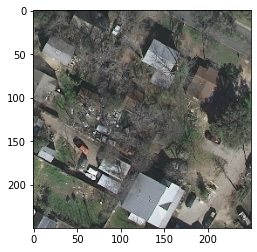

In [34]:
plt.imshow(image_to_plot);